# Методы обучения без учителя.

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [42]:
iris = load_iris()
D1 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
#D1['target'] = pd.Series(iris.target)
D1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [44]:
pca = PCA(n_components=2)
pca.fit(D1)
D2 = pca.transform(D1)
#D2 = pd.DataFrame(data = df_pca)
D2

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [45]:
#D3 = pd.DataFrame(data =TSNE(n_components=2, learning_rate='auto',
D3 = data =TSNE(n_components=2, learning_rate='auto',
           init='random', perplexity=3).fit_transform(D1)
D3

array([[  3.291308  ,  21.05908   ],
       [ 30.635342  , -42.8963    ],
       [ 19.25439   , -48.224014  ],
       [ 20.391172  , -46.130882  ],
       [  1.6347802 ,  18.02694   ],
       [  7.371707  ,  40.069485  ],
       [ 17.112696  , -47.159145  ],
       [  8.487395  ,  20.30127   ],
       [ 17.852905  , -56.388725  ],
       [ 27.405636  , -42.680584  ],
       [  5.638576  ,  35.61726   ],
       [ 20.668575  , -40.376072  ],
       [ 30.129927  , -44.00592   ],
       [ 20.248846  , -55.9837    ],
       [  4.429186  ,  48.552498  ],
       [  2.0876303 ,  49.2307    ],
       [  3.8467119 ,  36.48994   ],
       [  2.4066813 ,  21.115858  ],
       [  8.170226  ,  39.712795  ],
       [  0.77591866,  41.945354  ],
       [  6.5234265 ,  27.173185  ],
       [ -0.13607238,  41.392647  ],
       [ 15.443193  , -47.186222  ],
       [-10.018793  ,  26.273623  ],
       [ 20.04353   , -39.022766  ],
       [ 27.342913  , -40.166546  ],
       [ -9.303188  ,  26.677607  ],
 

In [46]:
from itertools import cycle, islice
def visualize_clusters(cluster_datasets, cluster_results):
    """
    Визуализация результатов кластерного анализа
    """
    plt.subplots(figsize=(10,7))
    plot_num = 0
    for X, y_pred in zip(cluster_datasets, cluster_results):
        plot_num += 1
        plt.subplot(2, 3, plot_num)
        # Цвета точек как результат кластеризации
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # черный цвет для выделяющихся значений
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=3, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
       # plt.title(datasets_names[plot_num-1])
    
    plt.show()

In [47]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def run_plot(D):
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = D[:, 0], D[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    ax.scatter(X0, X1, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()


In [50]:
df = pd.DataFrame(D2)
df

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


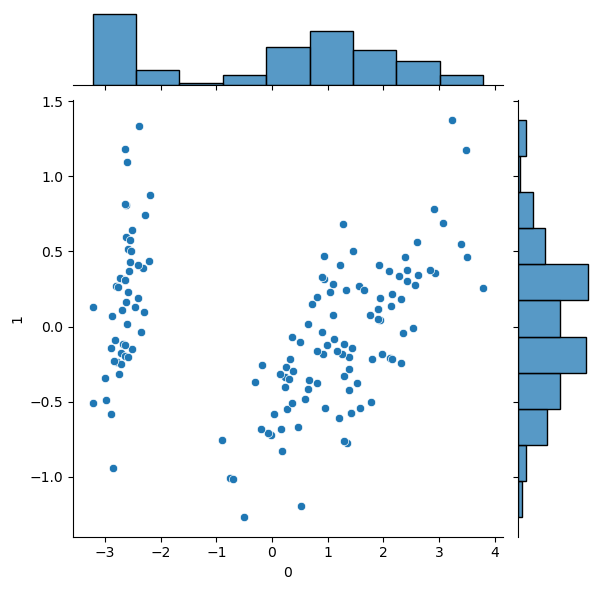

In [55]:
sns.jointplot(x=df[0], y=df[1], data=df)

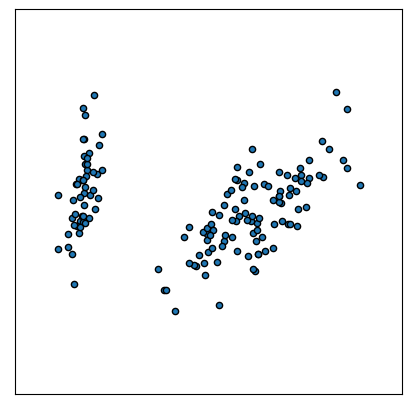

In [48]:
run_plot(D2)

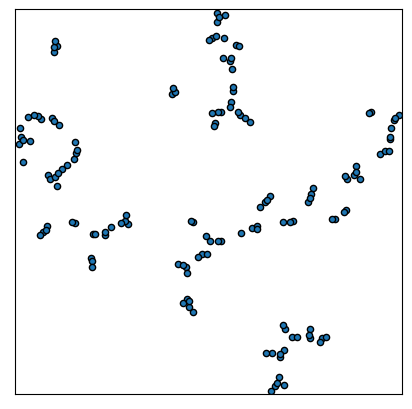

In [49]:
run_plot(D3)